<a href="https://colab.research.google.com/github/vijitha18/The-spark-foundation/blob/main/TASK_1_Exploring_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name : B Sri Sai Vijitha

#TASK-1

##Predict the percentage of an student based on the no. of study hours.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###Discover and visulaize the data to gain insigths


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


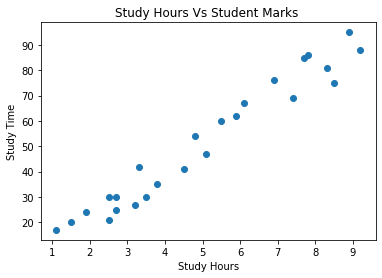

In [ ]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Study Time")
plt.title("Study Hours Vs Student Marks ")
plt.show()

###Prepare The Data For Machine Learning Algorithm


#### #data cleaning

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# split dataset for training
x=data.drop("Scores", axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.6, random_state=51)
 # tes_size is defining how much data we want for testing so 0.6 means i am using 20 percent data for testing

In [ ]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)

shape of X Train (10, 1)
shape of Y Train (10, 1)
shape of X Test (15, 1)
shape of Y Test (15, 1)


###Select a model and train it


In [ ]:
# So in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear format so we can use linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([[10.5967269]])

In [ ]:
lr.intercept_

array([0.07420867])

In [ ]:
lr.predict([[4]])[0][0].round(2)

42.46

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([[58.35620661],
       [81.66900579],
       [73.19162427],
       [88.02704193],
       [28.68537129],
       [54.11751585],
       [78.48998772],
       [33.98373474],
       [62.59489737],
       [97.56409614],
       [90.14638731],
       [35.04340743],
       [37.16275281],
       [94.38507807],
       [20.20798977]])

In [ ]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["Hours","Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,58.356207
1,7.7,85.0,81.669006
2,6.9,76.0,73.191624
3,8.3,81.0,88.027042
4,2.7,30.0,28.685371
5,5.1,47.0,54.117516
6,7.4,69.0,78.489988
7,3.2,27.0,33.983735
8,5.9,62.0,62.594897
9,9.2,88.0,97.564096
